In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
%matplotlib notebook

df1 = pd.read_csv(r'./final_dataset.csv')

In [3]:
df1

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,...,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,...,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,...,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,...,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [4]:
df1.rename(columns={
'FTHG' : 'HomeGoals',
'FTAG' : 'AwayGoals',
'FTR' : 'Result'
},inplace  =True)

In [5]:
df = df1[['Date','HomeTeam','AwayTeam','HomeGoals','AwayGoals','Result']]

In [19]:
df

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,2000-08-19,Charlton,Man City,4,0,H
1,2000-08-19,Chelsea,West Ham,4,2,H
2,2000-08-19,Coventry,Middlesbrough,1,3,A
3,2000-08-19,Derby,Southampton,2,2,D
4,2000-08-19,Leeds,Everton,2,0,H
...,...,...,...,...,...,...
6835,2018-05-13,Newcastle,Chelsea,3,0,H
6836,2018-05-13,Southampton,Man City,0,1,A
6837,2018-05-13,Swansea,Stoke,1,2,A
6838,2018-05-13,Tottenham,Leicester,5,4,H


In [9]:
df['Result']=np.sign(df['HomeGoals']-df['AwayGoals']).map({1:'H',0:'D',-1:'A'})

<ipython-input-9-86f79a7c1064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result']=np.sign(df['HomeGoals']-df['AwayGoals']).map({1:'H',0:'D',-1:'A'})


In [ ]:
## Which Team has the most Away wins in the past 10 years and how many goals did they score in total? plot only those with more than 10 total wins.

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df10=df[df['Date']>'2009-12-30']

In [30]:
#df10.reset_index(inplace = True, drop = True)

In [31]:
df10

,Date,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result
0,2010-01-16,Wolves,Wigan,0,2,A
1,2010-01-17,Bolton,Arsenal,0,2,A
2,2010-01-30,Burnley,Chelsea,1,2,A
3,2010-01-30,Fulham,Aston Villa,0,2,A
4,2010-01-30,Wigan,Everton,0,1,A
...,...,...,...,...,...,...
920,2018-08-05,Swansea,Southampton,0,1,A
921,2018-05-13,Burnley,Bournemouth,1,2,A
922,2018-05-13,Huddersfield,Arsenal,0,1,A
923,2018-05-13,Southampton,Man City,0,1,A


In [28]:
df10=df10[df10['Result']=='A']

In [54]:
df100=df10.groupby('AwayTeam').count()

In [60]:
df100=df100[df100['Result']>10]

In [61]:
df100

,Date,HomeTeam,HomeGoals,AwayGoals,Result
AwayTeam,,,,,
Arsenal,72,72,72,72,72
Aston Villa,27,27,27,27,27
Bournemouth,13,13,13,13,13
Burnley,12,12,12,12,12
Chelsea,79,79,79,79,79
Crystal Palace,27,27,27,27,27
Everton,41,41,41,41,41
Fulham,15,15,15,15,15
Leicester,22,22,22,22,22


In [34]:
##plotting

<IPython.core.display.Javascript object>


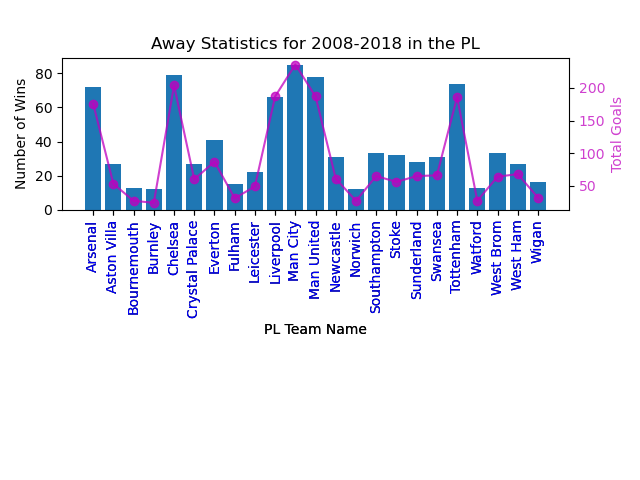

Text(0.5, 1.0, 'Away Statistics for 2008-2018 in the PL')

In [114]:
fig = plt.figure()
wins = df100
ax1 = fig.add_subplot(111)
teams = [teams for teams,df in df100.groupby('AwayTeam')]

plt.bar(teams, wins['Result'])
plt.xticks(teams, rotation= 'vertical')##in x jo bhi 2 4 6 tha usko 1 2 3 4 5 6 banaya
plt.ylabel('Number of Wins')
plt.xlabel('PL Team Name')
#plt.show
plt.tick_params(axis="x", labelsize=10)

ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.plot(teams, dfgg, '-o', color = 'm', alpha = 0.75)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.xticks(teams, rotation= 'vertical',color='blue')
plt.yticks(color = 'm', alpha = 0.75)
plt.ylabel("Total Goals", color = 'm', alpha = 0.75)
plt.xlabel('PL Team Name')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.title('Away Statistics for 2008-2018 in the PL')

In [115]:
plt.savefig('pl.pdf')

In [83]:
dfg=df10.groupby('AwayTeam').sum()

In [84]:
dfg

,HomeGoals,AwayGoals
AwayTeam,,
Arsenal,43,176
Aston Villa,17,53
Birmingham,2,5
Blackburn,7,17
Blackpool,1,11
Bolton,11,26
Bournemouth,9,27
Brighton,0,4
Burnley,7,24


In [87]:
result = pd.concat([df100['Result'],dfg],axis=1)

In [90]:
dfgg=result[result['Result']!='NaN']

c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [93]:
dfgg=dfgg.dropna()

In [95]:
dfgg=dfgg['AwayGoals']

In [96]:
dfgg

Arsenal           176
Aston Villa        53
Bournemouth        27
Burnley            24
Chelsea           204
Crystal Palace     60
Everton            87
Fulham             31
Leicester          49
Liverpool         187
Man City          236
Man United        187
Newcastle          61
Norwich            27
Southampton        65
Stoke              56
Sunderland         65
Swansea            66
Tottenham         186
Watford            27
West Brom          64
West Ham           68
Wigan              32
Name: AwayGoals, dtype: int64